In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = pd.read_excel (r'C:\Users\callu\Dropbox\03ShOpen1mmGBon_29.38mK_BB3.21.xlsx')
data2 = pd.read_excel (r'C:\Users\callu\Dropbox\University\Year 3\Block 2b\Project\_C04P03ShClosed_44.66mK_BB3.20K.xlsx')

AB
0.06588965066010206 -0.06752883149777128
CD
0.06604480329198512 0.06454980679108925
-0.0014895123533410146


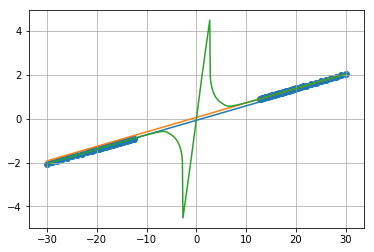

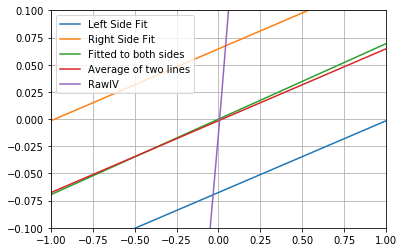

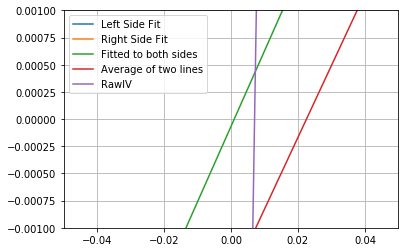

In [3]:
def f(x, A, B):
    ''' 
    Function of straight line for optimisation function to find
    coefficients for.
    '''
    return A*x + B

# Fit straight line to whole dataset to try and find intercepts

n = 50
y1 = (data['bias'].values)[:n]
y2 = ((data['bias']).values)[-n:]
y = np.append(y2, y1)

x1 = data['V fb (V)'][:n]
x = np.append(data['V fb (V)'][-n:], x1)
x2 = data['V fb (V)'][-n:]

A,B = curve_fit(f, y1, x1)[0]
C,D = curve_fit(f, y2, x2)[0]
E,F = curve_fit(f, y, x)[0]
print("AB")
print(A , B)
print("CD")
print(C , D)

# This technique gives a line that is way off what I want

plt.grid()
xvals = np.arange(-30, 30)
plt.plot(xvals, f(xvals, A , B))
plt.plot(xvals, f(xvals, C , D))
plt.plot(data['bias'], data['V fb (V)'])
bias = []
v = []
for i in range(len(data)):
    if i < n or i > len(data)-n:
        bias.append(data['bias'][i])
        v.append(data['V fb (V)'][i])
plt.scatter(bias,v)

average = (B + D)/2
print(average)
plt.show()
################
plt.grid()
plt.axis([-1,1,-.1,.1])
xvals = np.arange(-30, 30)
plt.plot(xvals, f(xvals, A , B), label='Left Side Fit')
plt.plot(xvals, f(xvals, C , D), label='Right Side Fit')
plt.plot(xvals, f(xvals, E , F), label='Fitted to both sides')
plt.plot(xvals, f(xvals, C , average), label='Average of two lines')

plt.plot(data['bias'], data['V fb (V)'], label='RawIV')

plt.legend()
plt.show()
################
plt.grid()
plt.axis([-.05,.05,-.001,.001])
xvals = np.arange(-30, 30)
plt.plot(xvals, f(xvals, A , B), label='Left Side Fit')
plt.plot(xvals, f(xvals, C , D), label='Right Side Fit')
plt.plot(xvals, f(xvals, E , F), label='Fitted to both sides')
plt.plot(xvals, f(xvals, C , average), label='Average of two lines')

plt.plot(data['bias'], data['V fb (V)'], label='RawIV')

plt.legend()

    Something strange is happening here. Drawing lines on both sides gives a beatiful straight line but they do not meet. Fitting to both sides previously had resulted in the angle being slightly off. If we average them we get an answer but not similar to what was calculated by hand. What phenomena explains this discrepancy? 

AB
0.06651396259024646 -0.04788031569086678
CD
0.06667937045786403 0.045018836814588466


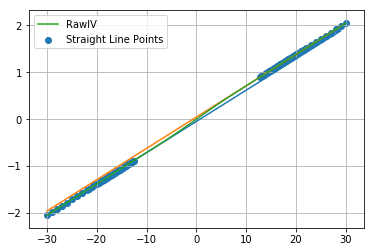

0.009399527383498623

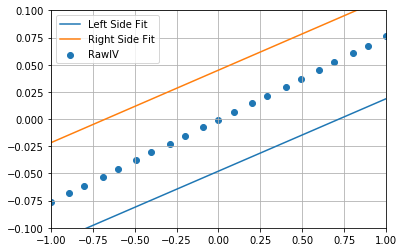

In [4]:
y1s = (data2['bias'].values)[:n]
y2s = ((data2['bias']).values)[-n:]
ys = np.append(y2s, y1s)

x1s = data2['V fb (V)'][:n]
xs = np.append(data2['V fb (V)'][-n:], x1)
x2s = data2['V fb (V)'][-n:]

As,Bs = curve_fit(f, y1s, x1s)[0]
Cs,Ds = curve_fit(f, y2s, x2s)[0]
print("AB")
print(As , Bs)
print("CD")
print(Cs , Ds)
plt.grid()
# This technique gives a line that is way off what I want

xvals = np.arange(-30, 30)
plt.plot(xvals, f(xvals, As , Bs))
plt.plot(xvals, f(xvals, Cs , Ds))
plt.plot(data2['bias'], data2['V fb (V)'], label="RawIV")

bias2 = []
v2 = []
for i in range(len(data)):
    if i < n or i > len(data)-n:
        bias2.append(data2['bias'][i])
        v2.append(data2['V fb (V)'][i])
plt.scatter(bias2,v2, label='Straight Line Points')
plt.legend()
plt.show()
###################################
plt.grid()
plt.axis([-1,1,-.1,.1])
xvals = np.arange(-30, 30)
plt.plot(xvals, f(xvals, As , Bs), label='Left Side Fit')
plt.plot(xvals, f(xvals, Cs , Ds), label='Right Side Fit')
plt.scatter(data2['bias'], data2['V fb (V)'], label='RawIV')

plt.legend()

(Bs + Cs)/2

(105, 241)
0.07047386448461312 0.00018499245302272538


(0.07047386448461312, 0.00018499245302272538)

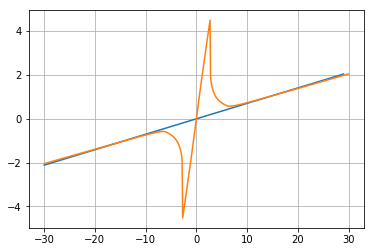

In [5]:
np.gradient(data['V fb (V)'])

def identify_regions(data, threshold):
    '''
    This function accepts a data frame and a threshold to compare the 
    gradient to. Checks either side of data set and identifies regions
    before the spikes.
    Returns a tuple of indices which correspond to the ranges we are 
    interested in
    #TODO Find out what threshold is justified
    #TODO generalise for other colomn names?
    '''
    front = 0 
    back = 0 
    threshold = int((len(data)/100) * threshold)
    grad = np.gradient(data['V fb (V)']) #Gradient of the Voltages
    for i in range(len(data)): 
        if grad[i] <= 0:#Check from the start until grad 
            front = i - threshold         #hits the threshold then store index
            break
    for n in range(len(data)):
        if grad[-n] <= 0:
            back = len(data) - n + threshold
            break
    return front , back

# A,B = curve_fit(f, data['bias'], data['V fb (V)'])[0]
def fitLine(data, region):
    ''' 
    Accepts a data frame and a tuple of indices. These are then used 
    to fit a straight line to the straight regions and plots the
    line with the data in the frame. 
    Returns nothing.
    #TODO Generalise!!
    '''
    front , back = region # Unpack data ranges from region
    
    firstx = data['bias'][0]
    lastx = data['bias'][len(data) -1]
    
    xvals = np.arange(firstx, lastx)
    
    #Slice the data in the frame and store in an array 
    yvals1 = (data['V fb (V)'][:front]).values
    yvals2 = (data['V fb (V)'][back:]).values
    lineDataY = np.append(yvals1, yvals2)
    
    xvals1 = (data['bias'][:front]).values
    xvals2 = (data['bias'][back:]).values
    
    lineDataX = np.append(xvals1, xvals2)
    
    #fit the sliced data to a line
    C, D = curve_fit(f, lineDataX, lineDataY)[0]
    
    print(C, D)
    
    ###############plotting area#######################
    #TODO save plots and data somewhere?
    
    plt.plot(xvals, f(xvals, C , D))
    #plt.axhline(y=0)
    #plt.axvline(x=0)
    plt.grid()
    plt.plot(data['bias'], data['V fb (V)'])
    #plt.plot(lineDataX, lineDataY)
    
    return C , D

thresh = 1
print(identify_regions(data,thresh))

fitLine(data, identify_regions(data, thresh))

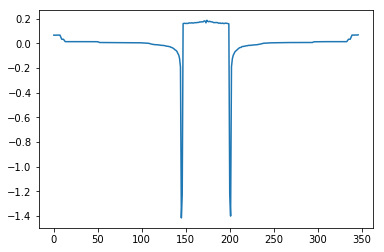

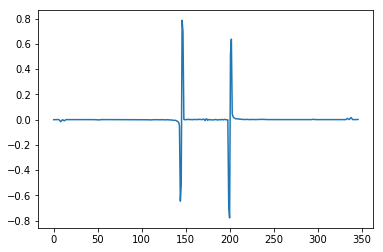

In [6]:
# Look at the gradient of the line to identify inflection points
plt.plot(np.gradient(data['V fb (V)']))
plt.show()
plt.plot(np.gradient(np.gradient(data['V fb (V)'])))

In [233]:
class TES(object):
    '''
    '''
    # initialise with raw IV data and maybe other params?
    def __init__(self, rawIV, params=0): 
        self.rawIV = rawIV
        self.params = params
        # Values hard coded (for now) taken from spreadsheet
        self.R_fb = 100099.6
        self.M_ratio = 18.9333333333333
                
        self.gain = self.R_fb / self.M_ratio
        
        self.R_shunt = 0.00389
        self.R_stray = 0.0005
    
    def smooth_IV():
        #TODO
        ''' Maybe a function to smooth noisy data before we find the 
        y offset. 
        Inputs: rawIV (or just use self?)
        Outputs: stores smoothRawIV in self
        '''
        pass
    
    def y_offset(self, thresholdPercentage):
        '''
        Input: Threshold percentage (int)
        OutPut: D (float)
        '''
        ranges = identify_regions(self.rawIV, thresholdPercentage)
        C, D = fitLine(self.rawIV, ranges)
        self.y_offset = D
        
    def calc_I_TES(self, tweak):
        '''
        Generate I_tes (array) data from tweak(float), y_offset (float)
        , gain (float).
        '''
        #TODO generate 
        #1/10**4 is fudge factor to align with sheet #TODO FIND FUDGE
        self.I_TES = [(entry - self.y_offset) *(1/10**4) * self.gain for entry in self.rawIV['V fb (V)']]
        
    def calc_V_bias(self):
        '''
        Generates B_bias data
        '''
        self.V_bias = []
        for index in range(len(data)):
            self.V_bias.append((data['bias'][index] * self.R_shunt) - (self.I_TES[index]*(self.R_shunt + self.R_stray)))
        
    def plotIV(self):
        '''
        
        '''
        #plt.plot(self.V_bias, self.I_TES)
        analysed_IV = pd.DataFrame(
            {'V fb (V)': self.V_bias,
             'bias': self.I_TES,
            })
        regions = identify_regions(analysed_IV, 10)
        print(regions)
        fitLine(analysed_IV, regions)
        
        
        

0.07013610135092374 5.980934906169022e-05


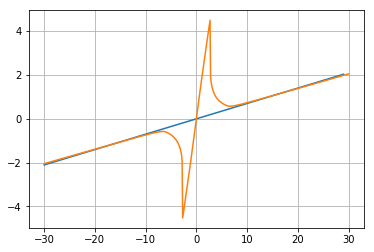

(129, 220)
0.09656823066148218 0.0002184565176975075


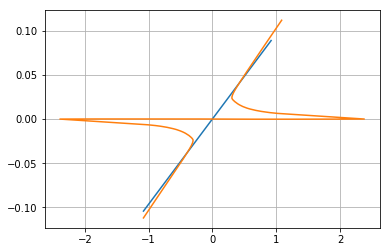

In [235]:
TESt = TES(data)
TESt.y_offset(5)
TESt.calc_I_TES(1)
TESt.calc_V_bias()

#print(TESt.V_bias)
#print(TESt.I_TES)
plt.show()
TESt.plotIV()

Ok so this uncovers some problems in the spaghetti code that I have written. Ideally, we want to have a nice clean
fitting function that takes any data frame and just plots the data against each other, then fits a curve. 
Biggest conceptual problem is how to reliably choose a threshold.

What to do next:
Rewrite the free functions as more general methods that exist in the class.
Find out why I need a fudge factor (milli units or something somewhere)
Fix the flipped graph and get a better straight line fit (rnn).

What about varying the threshold and taking an average of the offsets? Might give a more reliable result. 